In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## deforestation

In [105]:
forest = pd.read_csv('data/raw_forest.csv')
forest.drop(columns= ['Domain Code'], inplace=True)
forest.drop(columns= ['Area Code'], inplace=True)
forest.drop(columns= ['Element Code'], inplace=True)
forest.drop(columns= ['Item Code'], inplace=True)
forest.drop(columns= ['Year Code'], inplace=True)
forest.drop(columns= ['Flag', 'Flag Description'], inplace=True)
forest.to_csv('data/forest.csv')
forest.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Forest Land,Afghanistan,Area,Forest land,1990,1000 ha,1350.0
1,Forest Land,Afghanistan,Area,Forest land,1991,1000 ha,1350.0
2,Forest Land,Afghanistan,Area,Forest land,1992,1000 ha,1350.0
3,Forest Land,Afghanistan,Area,Forest land,1993,1000 ha,1350.0
4,Forest Land,Afghanistan,Area,Forest land,1994,1000 ha,1350.0


In [106]:
print(f'number of rows in total: {forest.shape[0]}\n')
print(f"Area (contries): {forest['Area'].unique().size} in total")
print(f"Element: {forest['Element'].unique()}")
print(f"Items: {forest['Item'].unique()}")
print(f"Year: {min(forest['Year'].unique())} till {max(forest['Year'].unique())}")
print(f"Unit: {forest['Unit'].unique()}")

number of rows in total: 50562

Area (contries): 237 in total
Element: ['Area' 'Implied emission factor for CO2'
 'Net emissions/removals (CO2) (Forest land)'
 'Net emissions/removal (CO2eq) (Forest land)']
Items: ['Forest land' 'Net Forest conversion']
Year: 1990 till 2017
Unit: ['1000 ha' 'tonnes CO2/ha' 'gigagrams']


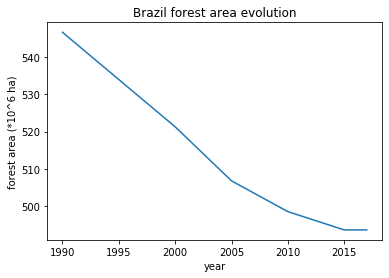

In [108]:
brazil = forest[forest['Area'] == "Brazil"]
area = brazil[brazil["Element"] == 'Area']
values = area[area['Item'] == 'Forest land'].Value.values
values = values/1000
years = area[area['Item'] == 'Forest land'].Year.values
plt.plot(years, values)
plt.xlabel("year")
plt.ylabel("forest area (*10^6 ha)")
plt.title("Brazil forest area evolution")
plt.savefig("data/Brazil_forest")

## Species

In [119]:
species = pd.read_csv('data/raw_species.csv')
species.drop(columns= ['IUCN', "SPEC", "COU", "Unit Code", 'PowerCode Code', 'PowerCode', 'Reference Period', 
                       'Flag Codes', "Flags", 'Reference Period Code'], inplace=True)
species.rename(columns={"IUCN Category": "Category", "Species": "Class"}, inplace=True)
species.to_csv('data/species.csv')
species[:5]

,Category,Class,Country,Unit,Value
0,Total number of known species,Mammals,Australia,Number,374.0
1,Total number of indigenous known species,Mammals,Australia,Number,348.0
2,Number of endangered species,Mammals,Australia,Number,37.0
3,Number of critically endangered species,Mammals,Australia,Number,10.0
4,Number of vulnerable species,Mammals,Australia,Number,60.0


In [120]:
species.Category.unique()

array(['Total number of known species',
       'Total number of indigenous known species',
       'Number of endangered species',
       'Number of critically endangered species',
       'Number of vulnerable species',
       'Total number of threatened species',
       'Number of endangered indigenous species',
       'Number of critically endangered indigenous species',
       'Number of vulnerable indigenous species',
       'Threatened species as % of known species',
       'Total number of indigenous threatened species',
       'Threatened indigenous species as % of indigenous spec.'],
      dtype=object)

In [121]:
print(f'Number of Classes: {species.Class.unique().size}')
print(f'Number of Countries: {species.Country.unique().size}')
print(f'Units: {species.Unit.unique()}')

Number of Classes: 11
Number of Countries: 40
Units: ['Number' 'Percentage']
